## Objective: 

This blog post consists of 5 parts:

1. **Introduction** of our project

2. Dataset preparation, **data cleaning**, **feature selection**, checking for **bias**

3. Training **Linear Regression Model**

4. Training **Univariate Time Series Analysis**

5. **Conclusion** and future discussion

### **Part 1: Introduction**

In [2]:
import numpy as np
import pandas as pd

### **Part 2: Dataset Preparation**

We used two datasets for our project. 

- The data was collected every hour.

In [4]:
energy = pd.read_csv("DataSets/energy_dataset.csv")
weather= pd.read_csv("DataSets/weather_features.csv")

- The "energy" dataset contains 4 years of electrical consumption, energy generation, and pricing data in Spain:

In [5]:
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


- The "weather" dataset contains 4 years of weather data in Spain:

In [6]:
weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### Data Cleaning

#### Cleaning **Energy dataset**

In [7]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

- From the energy.head, we can see that there are certain columns that are **all zeros** in the first 5 rows, therefore, we can sum all the entries in the columns to see if the total sum is 0. If total sum is zero, we can conclude that this feature column does not affect the energy consumption, and therefore, we can **drop** those feature columns.

In [8]:
sum_1 = energy['generation fossil coal-derived gas'].sum()
sum_2 = energy['generation fossil oil shale'].sum()
sum_3 = energy['generation fossil peat'].sum()
sum_4 = energy['generation geothermal'].sum()
sum_5 = energy['generation marine'].sum()
sum_6 = energy['generation wind offshore'].sum()

print(sum_1)
print(sum_2)
print(sum_3)
print(sum_4)
print(sum_5)
print(sum_6)

0.0
0.0
0.0
0.0
0.0
0.0


#### **Drop zero columns**

- Given that the certain columns have 0 values for all entries, and the entries of some columns are all null, we can drop those columns:

In [10]:
energy = energy.drop(['generation fossil coal-derived gas',
                      'generation fossil oil shale',
                      'generation fossil peat',
                      'generation geothermal',
                      'generation hydro pumped storage aggregated',
                      'generation marine',
                      'generation wind offshore',
                      'forecast wind offshore eday ahead'],axis =1)

#### **Check null values**

- Now we also need to check to see if there are null values:

In [9]:
energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

Fill the null values into zeros and check:

In [10]:
energy = energy.fillna(0)
energy.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage aggregated     0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offs

#### Cleaning **Weather dataset**

**Check null values**

In [11]:
weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

- There are no null values in the weather dataset.

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

#### **Drop useless columns**

- Since "rain_3h" is redundant given "rain_1h", "weather_description" and "weather_icon" are useless in prediction, we can drop those features.

In [14]:
weather = weather.drop(['rain_3h','weather_id','weather_description', 'weather_icon'],axis=1)
#change the column name from dt_iso to time to facilitate the merging process
weather = weather.rename(columns = {'dt_iso': 'time'})

#### **Merging** two datasets

- Now we can merge the two datasets together to perform training.

In [16]:
df_merge=pd.merge(energy,weather,on ='time',how="left")
df_merge.set_index(['time'],inplace = True) #set time column as index
df_merge.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all,weather_main
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,0.0,...,270.475000,270.475000,1001,77,1,62,0.0,0.0,0,clear
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,0.0,...,267.325000,267.325000,971,63,1,309,0.0,0.0,0,clear
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,0.0,...,269.657312,269.657312,1036,97,0,226,0.0,0.0,0,clear
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,0.0,...,281.625000,281.625000,1035,100,7,58,0.0,0.0,0,clear
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,0.0,...,273.375000,273.375000,1039,75,1,21,0.0,0.0,0,clear


### **Feature Selection**

- We want to select several good features from the dataset by comparing the correlations between each feature and the target label("total load actual").

In [17]:
import numpy as np
correlations = df_merge.corr(method='pearson')
#print(correlations['price actual'].sort_values(ascending=False).to_string())
cor = correlations['total load actual']

#select the features that have correlation > 0.2
correlations[(np.abs(cor.values) > 0.2)]['total load actual']

/var/folders/h4/g2m40gs10fl3yvzdr50l4kb80000gn/T/ipykernel_63745/3559052820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_merge.corr(method='pearson')


generation fossil brown coal/lignite           0.277953
generation fossil gas                          0.542287
generation fossil hard coal                    0.391746
generation fossil oil                          0.495332
generation hydro pumped storage consumption   -0.548758
generation hydro water reservoir               0.470533
generation solar                               0.388988
forecast solar day ahead                       0.393712
total load forecast                            0.973929
total load actual                              1.000000
price day ahead                                0.463822
price actual                                   0.429285
humidity                                      -0.240089
Name: total load actual, dtype: float64

In [18]:
possible_features = ['generation fossil brown coal/lignite', 
                     'generation fossil gas',
                     'generation fossil hard coal',
                     'generation fossil oil',
                     'generation hydro pumped storage consumption',
                     'generation other renewable',
                     'generation wind onshore',
                     'price actual',
                     'price day ahead'
                     ]

Create a **Heapmap** to visualize the correlations:

/var/folders/h4/g2m40gs10fl3yvzdr50l4kb80000gn/T/ipykernel_63745/3817204910.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df_merge.corr(),1),annot=True,cmap='Blues',linewidth=0.9)


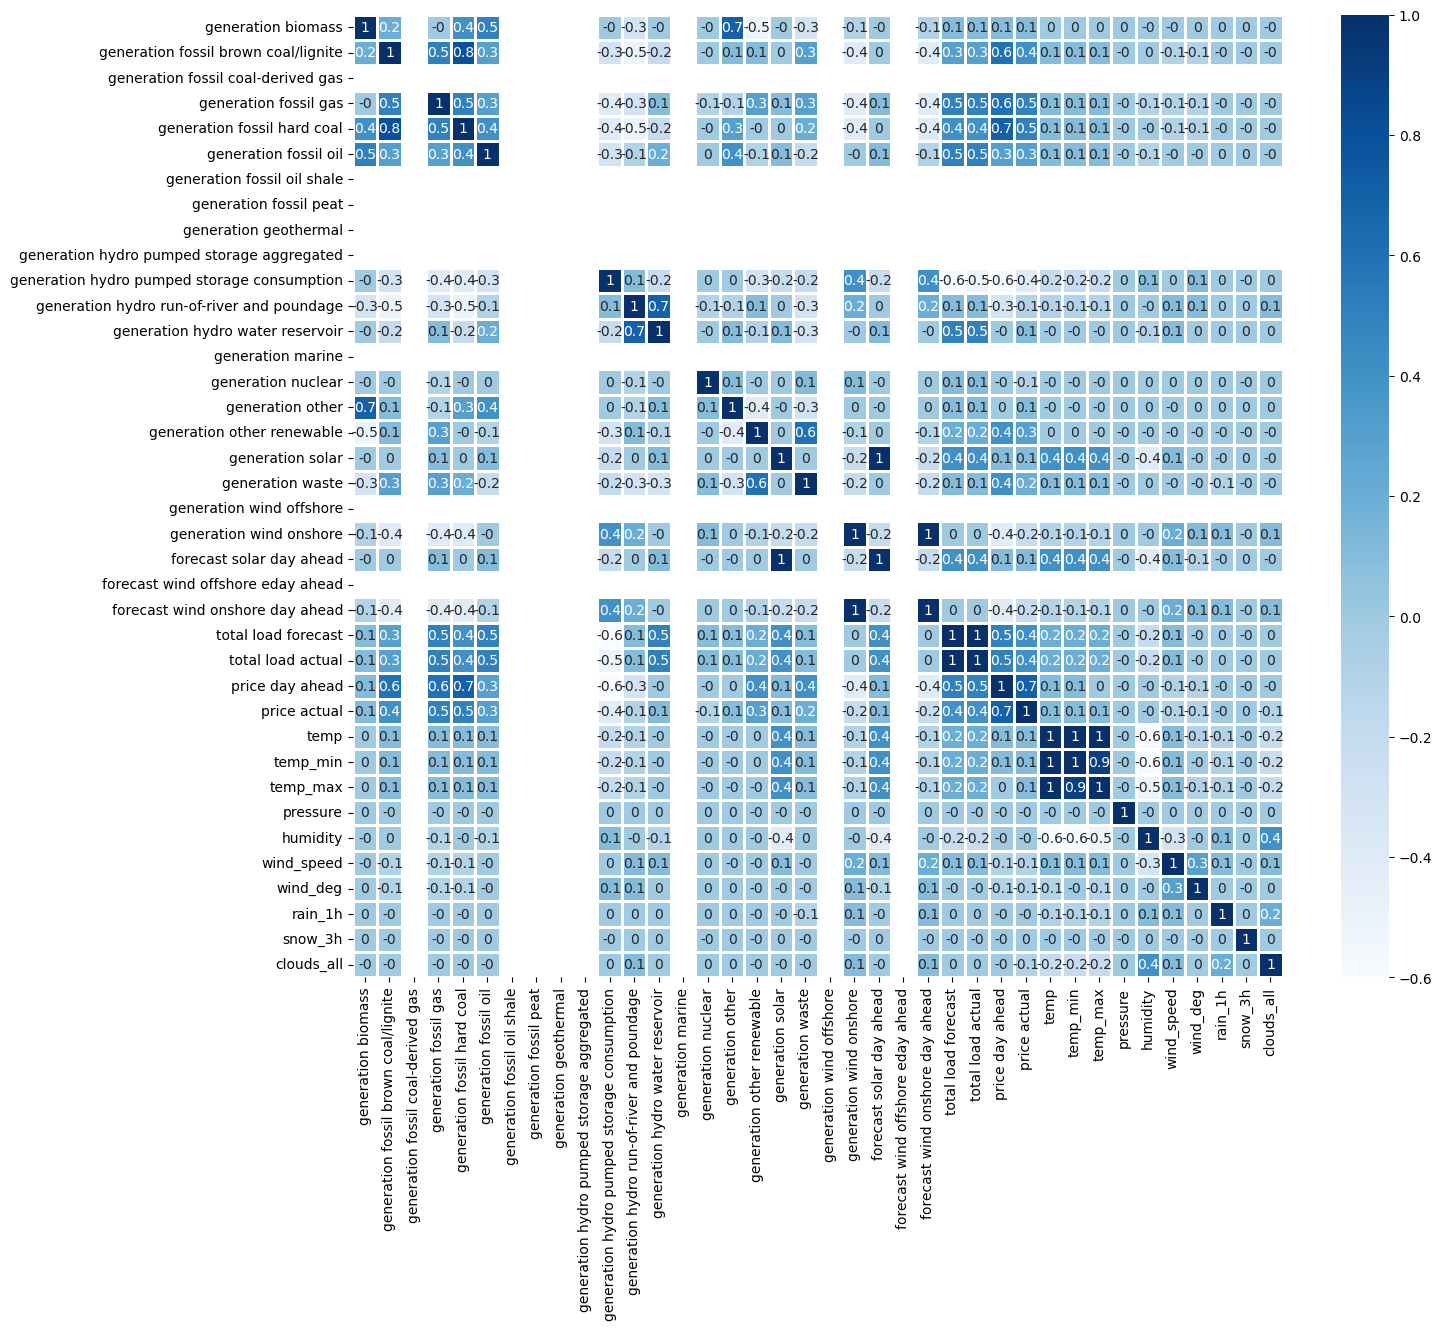

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12.5))
sns.heatmap(round(df_merge.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show()

### Check for **location bias**

- Since the dataset contains records for five different cities in Spain, we want to make sure that there are no location bias:

<Axes: xlabel='city_name'>

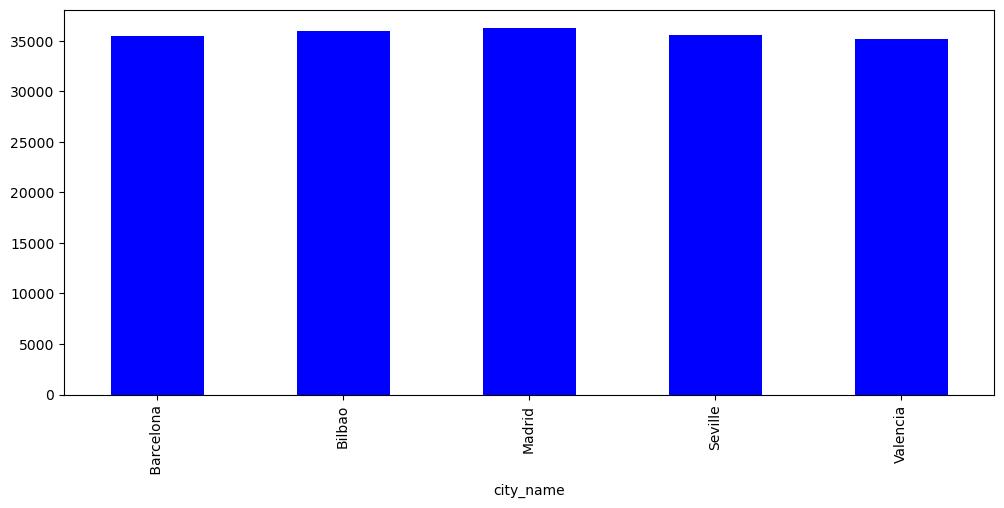

In [20]:
# As a check of number of records for each city simply check the number of temperature records and then plot.
df_merge.groupby(["city_name"])[['temp']].count().plot.bar(color="blue", legend=False, figsize=(12,5))

- According to the graph above, the number of records for all cities are relatively the same, so we can conclude that the dataset **does not** have location bias.

## **Part 3: Linear Regression Model**

- We believed that energy consumption might be affected by certains features such as **weather**, **energy generation**, and **price**,etc. So we use linear regression to examine the relationships between them. 

- We used the sklearn Linear Regression Model.

#### Perform Train-Test Split:

In [22]:
from sklearn.model_selection import train_test_split

features = df_merge[possible_features]
label = df_merge["total load actual"]
 
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

#### **Fit** the data:

In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
 
LR.fit(X_train, y_train)
print("Training score: ", LR.score(X_train, y_train))
print("Testing score: ", LR.score(X_test, y_test))

Training score:  0.6283008189564221
Testing score:  0.6284931709238322


#### Compare the training score with cross_validation score to see whether their might be **overfitting**:

In [26]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X_train, y_train, scoring='r2', cv=5)
print("Validation score: ", scores.mean())

Validation score:  0.628173896311795


Validation score is approximately the same as training score. So the model is **not** overfitting.

#### **Plot the regression line** for the first 100 data:

Text(0.5, 1.0, 'Regression line plot')

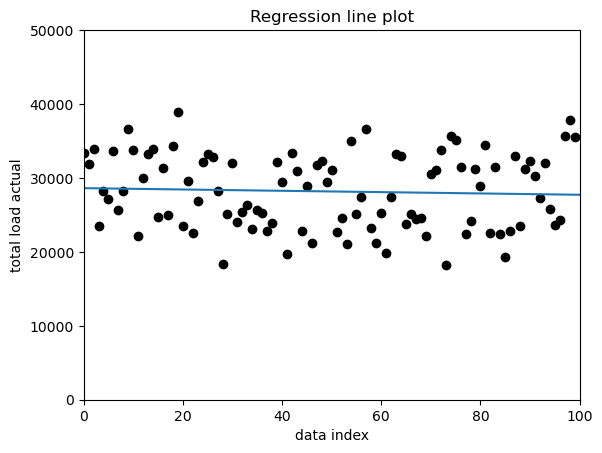

In [28]:
X_test_plt = X_test[:100] 
y_test_plt = y_test[:100]

X_test_1d = np.arange(0,len(X_test_plt),1) # make X_test into 1-dimensional for plotting
m, b = np.polyfit(X_test_1d, y_test_plt, 1)
plt.xlim(0,100)
plt.ylim(0,50000)
plt.xlabel("data index")
plt.ylabel("total load actual")
plt.scatter(X_test_1d, y_test_plt, color = "black")
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.title("Regression line plot")

According to the plot above, the points are **scattered evenly** and **horizontally** across the region.

This suggested that Linear regression might not be the optimal model.

## **Part 4: Univariate Time Series Analysis**

- Predict the energy consumption just from the energy price in the previous day

- Use only energy dataset

In [36]:
energy = pd.read_csv("DataSets/energy_dataset.csv")

#### Create **training and testing datasets**:

In [42]:
from sklearn.preprocessing import MinMaxScaler

temp = energy.copy() # make temporary copy of dataframe
dataset = temp['total load actual'].dropna().values # numpy.ndarray of the actual load
dataset = dataset.astype('float32') 
dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.80) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25 # timesteps to lookback for predictions
X_train, trainY = create_dataset(train, look_back)
X_test, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("Shapes: \nTraining set: {}, Testing set: {}".format(X_train.shape, X_test.shape))
print("Sample from training set: \n{}".format(X_train[0]))


Shapes: 
Training set: (27996, 1, 25), Testing set: (6980, 1, 25)
Sample from training set: 
[[0.31966567 0.27600765 0.20427442 0.14124662 0.09676152 0.08113521
  0.08570558 0.10168016 0.08936191 0.11299729 0.1832071  0.23966217
  0.26516938 0.2904153  0.2886306  0.23883522 0.22098899 0.2422303
  0.36589193 0.43436062 0.47762692 0.5018717  0.47836685 0.38117003
  0.39300954]]


#### Implement **Autoregressive Model** to fit the dataset:

In [38]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = AutoReg(train,lags=25) # random select a lag = 12
model_fit = model.fit()

#### Evaluate the model performance with **Mean Absolute Error**:

In [39]:
test_predict = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# invert predictions
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(test)
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

Test Mean Absolute Error: 3789.6124129227023
Test Root Mean Squared Error: 4453.831950176519


In [40]:
mape = np.mean(np.abs((Y_test - test_predict) / Y_test)) *100
print("Testing MAPE: {}".format(mape))

Testing MAPE: 13.554581287341577


#### **Visualize** actual and predicted total load:

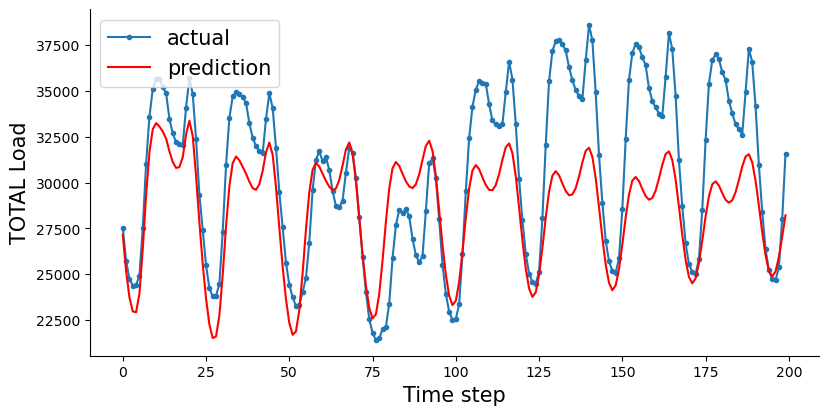

In [41]:
import seaborn as sns

idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()